<a href="https://colab.research.google.com/github/Dmitrii173173/Awesome-ML/blob/main/Image_Classification_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install tensorflow matplotlib

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [37]:
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [38]:
import os

# Get the directory name of the extracted folder
data_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')

# Define the image size and batch size
img_size = (160, 160)
batch_size = 32

# Load the training and validation datasets
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [39]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [40]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [41]:
pretrained_model.trainable = False

In [42]:
model = models.Sequential([
  pretrained_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(1)
])

In [43]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
75/75 [==============================] - 86s 1s/step - loss: 0.8123 - accuracy: 0.5721 - val_loss: 0.7402 - val_accuracy: 0.6483
Epoch 2/10
75/75 [==============================] - 59s 780ms/step - loss: 0.7129 - accuracy: 0.6408 - val_loss: 0.7209 - val_accuracy: 0.6567
Epoch 3/10
75/75 [==============================] - 65s 869ms/step - loss: 0.6932 - accuracy: 0.6500 - val_loss: 0.7048 - val_accuracy: 0.6533
Epoch 4/10
75/75 [==============================] - 64s 853ms/step - loss: 0.6812 - accuracy: 0.6554 - val_loss: 0.6948 - val_accuracy: 0.6633
Epoch 5/10
75/75 [==============================] - 66s 874ms/step - loss: 0.6714 - accuracy: 0.6587 - val_loss: 0.6880 - val_accuracy: 0.6633
Epoch 6/10
75/75 [==============================] - 54s 712ms/step - loss: 0.6668 - accuracy: 0.6612 - val_loss: 0.6826 - val_accuracy: 0.6633
Epoch 7/10
75/75 [==============================] - 54s 713ms/step - loss: 0.6609 - accuracy: 0.6662 - val_loss: 0.6824 - val_accuracy: 0.6650
Ep

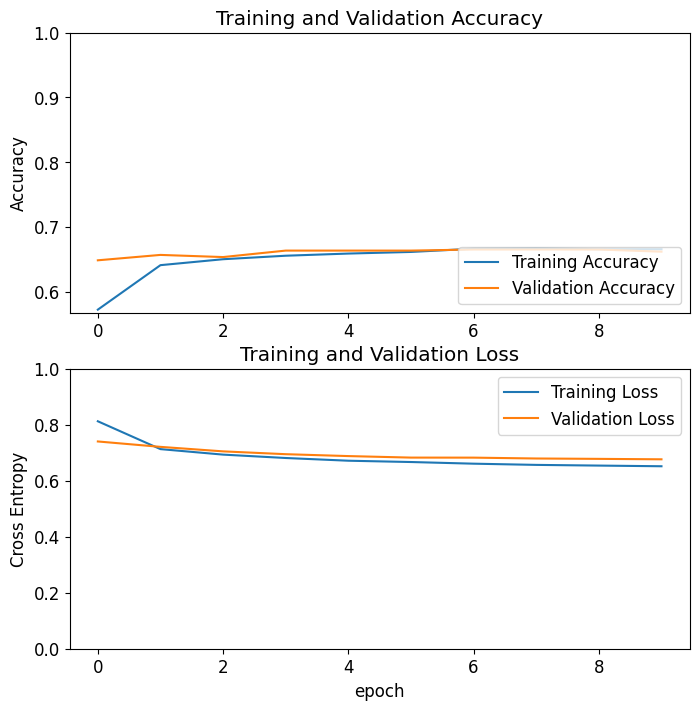

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()